***Prediction Of Metabolic syndrome in adults***

A complex medical condition which leads to increased risk of heart disease and related problems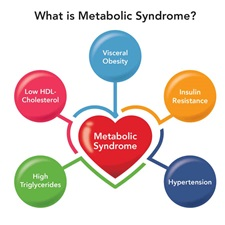

**The data:**

The data includes demographic, clinical, and laboratory measurements.

There is a training set containing data about the behavior of ~ 2400+ individuals (Metabolic Syndrome.csv). This data set contains 15 columns:

Personal information about individuals like:  age, gender, Marital status, Income, Race

And various health conditions like:              

 Waist Circumference, BMI, Albumin in urine, Albumine to Creatinine ratio, Uric Acid, Blood Glucose, HDL(the good cholestrol), Triglycerides.

The information about whether individuals were detected with Metabolic syndrome is indicated using Binary variable indicating the presence (1) or absence (0) of metabolic syndrome, which is our target variable.

The dataset is taken from Dataworld(https://data.world/informatics-edu/metabolic-syndrome-prediction) , who acquired the data from NHANES(National Health and Nutrition Examination initiative) in which several features were combined from multiple tables.

**Goal:**

Analyze which are the big risk factors for Metabolic syndrome.

Which category of persons are more prone to Metabolic Syndrome?

Predict presence of Metabolic syndrome in adults, whether positive or negative, based on common risk factors


**Main Tasks**

>[Task 1: Data preparation](#scrollTo=camljKW5qujH)

>[Task 2: Exploratory Data Analysis and Data Visualization](#scrollTo=BdK7qiR_uD5l)

>[Task 3: Data Modeling](#scrollTo=eodIJPHfrzDK)

>[Task 4: Evaluation](#scrollTo=nBo8frjuf_Hz)

>[Task 5: Conclusion](#scrollTo=lPIE44-HsgZI)



Task 1: Data preparation
-----------------------
Data Understanding using statistical description

Data preprocessing:
>392 rows having null values are deleted as part of Clean up

>outliers are detected in 7 attributes and handled with IQR method


1.1)Import libraries

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px

from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

from tensorflow import keras
import tensorflow as tf

from tensorflow.python.keras.layers import Input, Dense

# for now, ignore warnings
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", Warning)
#import the_module_that_warns

1.2) Load data

In [ ]:
df = pd.read_csv('/content/sample_data/Metabolic Syndrome.csv')

df.head(2)

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0


1.3)Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [ ]:
df.shape

(2401, 15)

In [ ]:
df.describe()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
count,2401.000000,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,67030.674302,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364,0.342357
std,2823.565114,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477,0.474597
min,62161.000000,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000,0.000000
25%,64591.000000,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000,0.000000
50%,67059.000000,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000,0.000000
75%,69495.000000,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000,1.000000
max,71915.000000,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000,1.000000


1.4)Data Preprocessing

In [ ]:
# Check missing values
df.isnull().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [ ]:
df_filtered = df[df.isnull().any(axis=1)]
df_filtered

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0
8,62191,70,Male,Divorced,1000.0,Black,NaN,NaN,1,45.67,5.4,96,35,75,0
9,62195,35,Male,NaN,2500.0,Black,99.0,28.2,0,2.21,6.7,94,46,86,0
10,62199,57,Male,NaN,9000.0,White,107.8,28.0,0,4.16,6.0,100,35,98,1
24,62239,22,Female,NaN,300.0,Hispanic,78.9,23.3,0,5.33,4.1,90,42,68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,71866,32,Male,Divorced,NaN,MexAmerican,89.3,27.3,0,7.76,5.8,98,53,86,0
2389,71877,72,Male,Married,NaN,Hispanic,101.6,25.4,1,71.84,6.0,135,39,105,1
2390,71885,35,Male,NaN,1600.0,MexAmerican,92.6,25.1,0,3.03,6.5,111,48,105,0
2396,71901,48,Female,Married,1000.0,Other,NaN,59.7,0,22.11,5.8,152,57,107,0


In [ ]:
df["Marital"].unique()

array(['Single', 'Married', 'Widowed', 'Divorced', nan, 'Separated'],
      dtype=object)

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

seqn                 0
Age                  0
Sex                  0
Marital              0
Income               0
Race                 0
WaistCirc            0
BMI                  0
Albuminuria          0
UrAlbCr              0
UricAcid             0
BloodGlucose         0
HDL                  0
Triglycerides        0
MetabolicSyndrome    0
dtype: int64

In [ ]:
df.shape

(2009, 15)

392 rows having null values are deleted as part of Clean up

Outlier detection:

In [ ]:
print("Numeric variables:")
display(df.describe().T)

Numeric variables:


,count,mean,std,min,25%,50%,75%,max
seqn,2009.0,67065.706322,2800.738021,62161.0,64682.00,67143.00,69488.00,71915.00
Age,2009.0,49.263813,17.421740,20.0,35.00,49.00,63.00,80.00
Income,2009.0,4147.187656,2984.597463,300.0,1600.00,3500.00,6200.00,9000.00
WaistCirc,2009.0,98.524141,16.306348,63.1,86.90,97.10,107.80,170.50
BMI,2009.0,28.733499,6.580322,15.7,24.10,27.70,32.10,68.70
Albuminuria,2009.0,0.147337,0.416533,0.0,0.00,0.00,0.00,2.00
UrAlbCr,2009.0,42.253375,241.419903,1.4,4.46,6.96,13.49,4462.81
UricAcid,2009.0,5.491488,1.428865,1.8,4.50,5.40,6.40,11.30
BloodGlucose,2009.0,108.008462,33.636746,39.0,92.00,100.00,110.00,382.00
HDL,2009.0,53.551020,15.012329,14.0,43.00,51.00,62.00,150.00


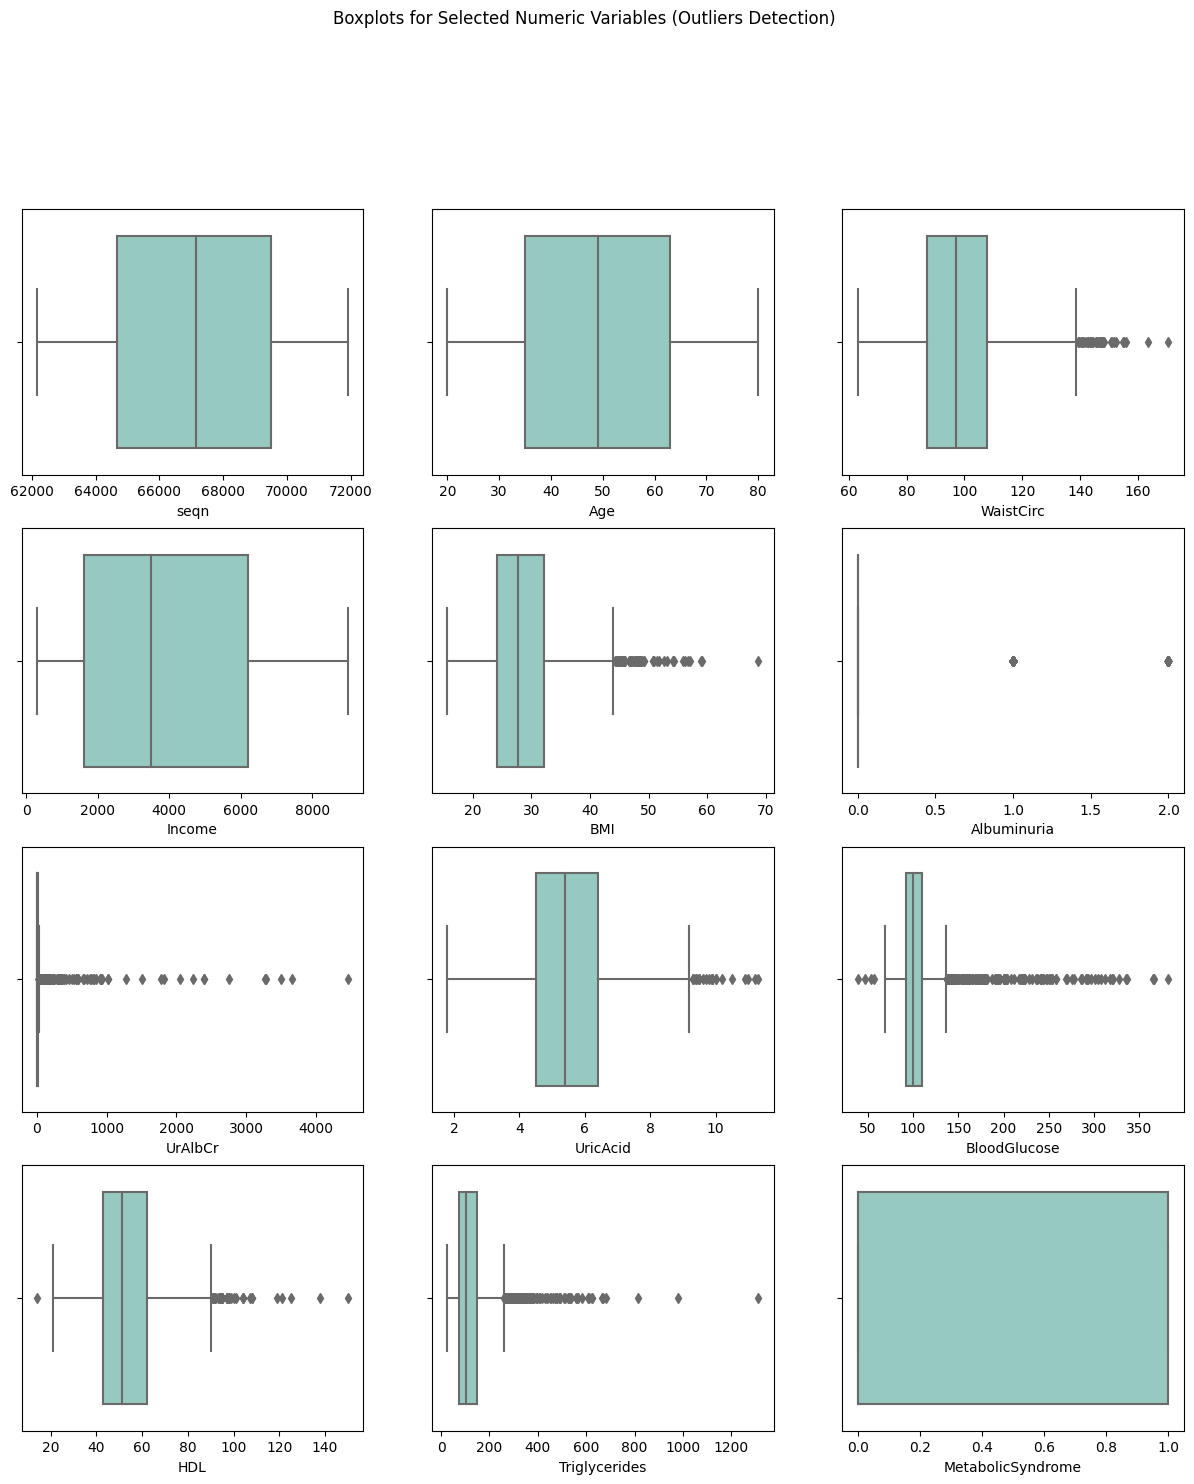

In [ ]:
fig, axes = plt.subplots( figsize=(15, 20))
fig.suptitle('Boxplots for Selected Numeric Variables (Outliers Detection)')

plt.subplot(5,3,1)
sns.boxplot(x=df["seqn"],palette='Set3')

plt.subplot(5,3,2)
sns.boxplot(x=df["Age"],palette='Set3')

plt.subplot(5,3,3)
sns.boxplot(x=df["WaistCirc"],palette='Set3')

plt.subplot(5,3,4)
sns.boxplot(x=df["Income"],palette='Set3')

plt.subplot(5,3,5)
sns.boxplot(x=df["BMI"],palette='Set3')

plt.subplot(5,3,6)
sns.boxplot(x=df["Albuminuria"],palette='Set3')

plt.subplot(5,3,7)
sns.boxplot(x=df["UrAlbCr"],palette='Set3')

plt.subplot(5,3,8)
sns.boxplot(x=df["UricAcid"],palette='Set3')

plt.subplot(5,3,9)
sns.boxplot(x=df["BloodGlucose"],palette='Set3')

plt.subplot(5,3,10)
sns.boxplot(x=df["HDL"],palette='Set3')

plt.subplot(5,3,11)
sns.boxplot(x=df["Triglycerides"],palette='Set3')

plt.subplot(5,3,12)
sns.boxplot(x=df["MetabolicSyndrome"],palette='Set3')

plt.show()

outliers are  detected in 7 attributes:   'WaistCirc', 'BMI', 'UrAlbCr', 'UricAcid','BloodGlucose','HDL','Triglycerides'

In [ ]:
Features_with_outliers=['WaistCirc', 'BMI', 'UrAlbCr', 'UricAcid','BloodGlucose',
                        'HDL','Triglycerides']

In [ ]:
def remove_outliers_iqr(data):

    # Calculating the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # Calculating the interquartile range (IQR)
    IQR = Q3 - Q1

    # Defining the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Removing outliers
    data = np.where(data>upper_bound, upper_bound, np.where(data<lower_bound,lower_bound,data))

    return data[(data >= lower_bound) & (data <= upper_bound)]

In [ ]:
for column in Features_with_outliers:
    df[column] = remove_outliers_iqr(df[column])

Verify outliers are handled by checking UrALbCR value for seqn 62727

In [ ]:
df[df['seqn']==62727]

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
140,62727,80,Female,Married,2500.0,White,97.5,30.8,2,27.035,7.8,132.0,65.0,130.0,1


In [ ]:
df.shape

(2009, 15)

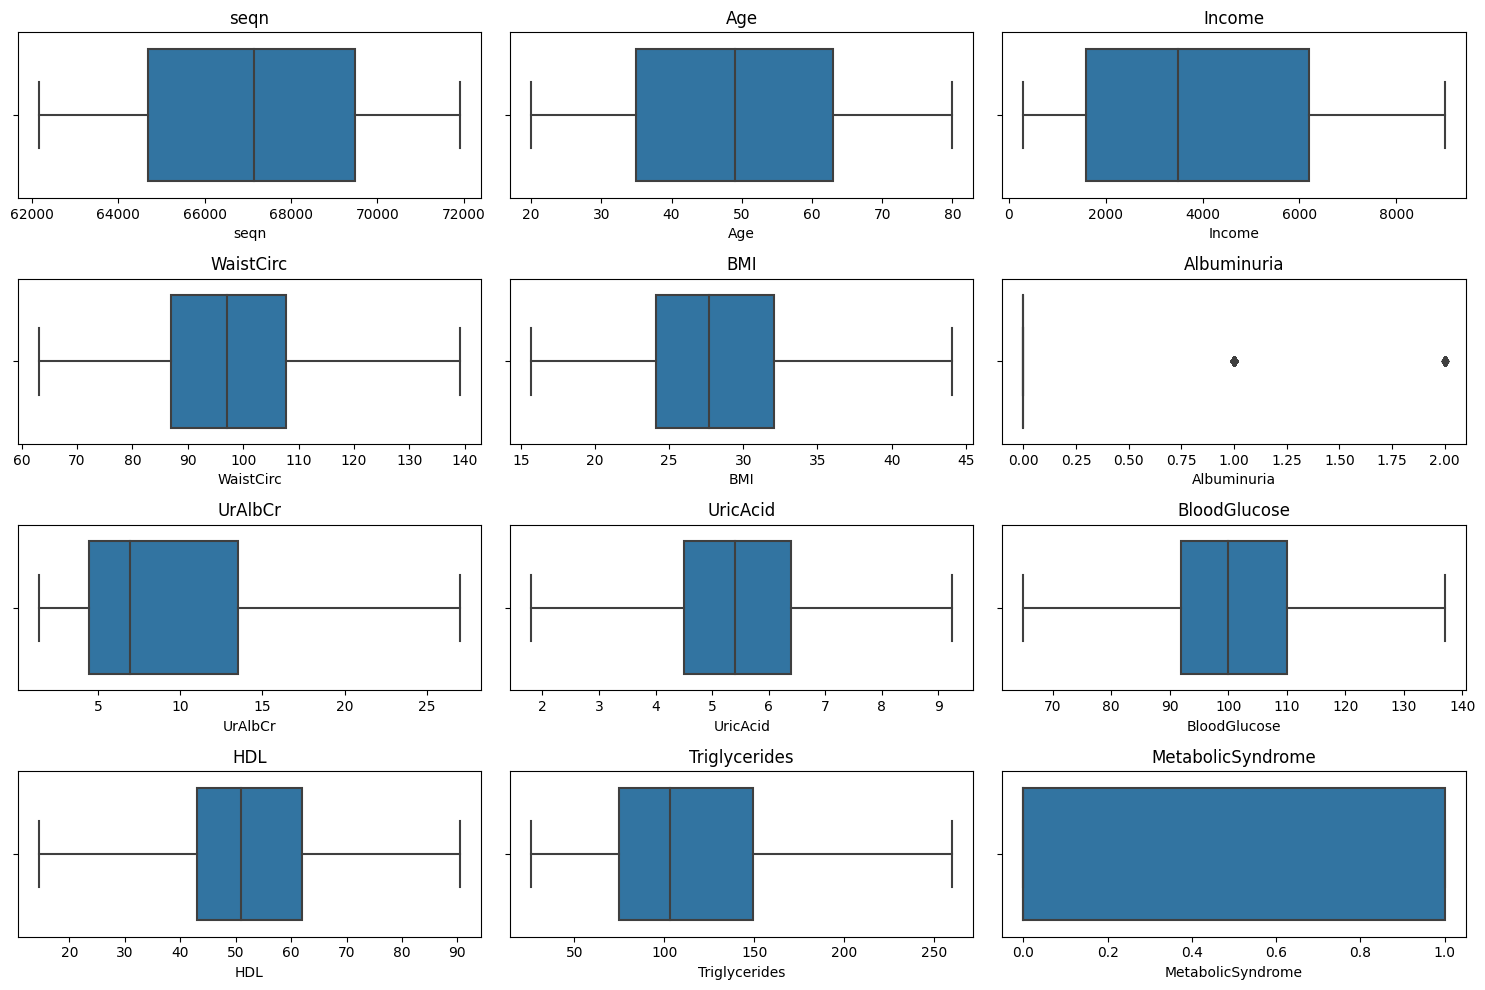

In [ ]:
#outliers detection after removing them
int_vars = df.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (int_vars):
    sns.boxplot(x=var,data=df,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

In [ ]:
print("After cleanup:")
display(df.describe().T)

After cleanup:


,count,mean,std,min,25%,50%,75%,max
seqn,2009.0,67065.706322,2800.738021,62161.0,64682.00,67143.00,69488.00,71915.000
Age,2009.0,49.263813,17.421740,20.0,35.00,49.00,63.00,80.000
Income,2009.0,4147.187656,2984.597463,300.0,1600.00,3500.00,6200.00,9000.000
WaistCirc,2009.0,98.374614,15.867341,63.1,86.90,97.10,107.80,139.150
BMI,2009.0,28.586063,6.113097,15.7,24.10,27.70,32.10,44.100
Albuminuria,2009.0,0.147337,0.416533,0.0,0.00,0.00,0.00,2.000
UrAlbCr,2009.0,10.410361,8.129149,1.4,4.46,6.96,13.49,27.035
UricAcid,2009.0,5.483001,1.402714,1.8,4.50,5.40,6.40,9.250
BloodGlucose,2009.0,103.023892,15.632177,65.0,92.00,100.00,110.00,137.000
HDL,2009.0,53.335490,14.277781,14.5,43.00,51.00,62.00,90.500


# Task 2: Exploratory Data Analysis and Data Visualization

Bar plot, pie chart, violin plot, Box plot, heat map are plotted to visualize the features.

Correlation between independent and target variable is checked.

The answer for Goal 1 and 2 are obtained in this section, which are verified and well-proved under Task 3(Data Modeling).

Data Encoding is performed using Dummy encoding as most of the categorical features donot have too much unique values.

In [ ]:
#labels for age
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
#use pandas cut to bin the continuous variable age
df['age_group'] = pd.cut(df.Age, range(0, 101, 10), labels=age_labels)


In [ ]:
#labels for BMI
bmi_labels = ['0-10', '10-20', '20-30', '30-40', '40-50']
#use pandas cut to bin the continuous variable BMI
df['bmi_group'] = pd.cut(df.BMI, range(0, 51, 10), labels=bmi_labels)


In [ ]:
#labels for Waist Circumference
waist_labels = ['60-90', '91-120', '121-150', '151-180']
#use pandas cut to bin the continuous variable age
df['waist_group'] = pd.cut(df.WaistCirc, range(60, 181, 30), labels=waist_labels)


In [ ]:
#labels for blood glucose
glucose_labels = ['60-80', '81-100', '101-120', '121-140']
#use pandas cut to bin the continuous variable age
df['glucose_group'] = pd.cut(df.BloodGlucose, range(60, 141, 20), labels=glucose_labels)


In [ ]:
#labels for income
income_labels = ['0-2500', '2501-5000', '5001-7500', '7501-10000']
#use pandas cut to bin the continuous variable age
df['income_group'] = pd.cut(df.Income, range(0, 10001, 2500), labels=income_labels)


In [ ]:
#labels for triglycerides
triglycerides_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300']
#use pandas cut to bin the continuous variable age
df['triglycerides_group'] = pd.cut(df.Triglycerides, range(0, 301, 50), labels=triglycerides_labels)

**[Bar plot] Distribution of Patients having Metabolic Syndrome in percentage**

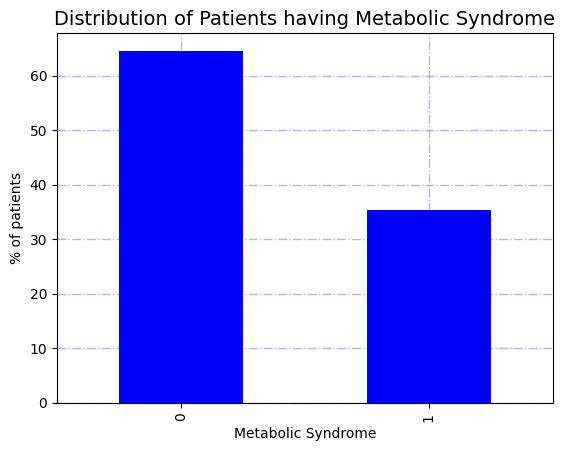

In [ ]:
df.MetabolicSyndrome.value_counts(normalize=True).mul(100).sort_index().plot(kind = "bar", color = 'blue')
plt.title("Distribution of Patients having Metabolic Syndrome", fontsize=14) # set the title
plt.ylabel('% of patients') # set the y label
plt.xlabel('Metabolic Syndrome') # set the x label
plt.grid(color = "blue", linewidth = "1", linestyle = "-.", alpha=0.3)

Almost 65% patients donot have metabolic syndrome, while 35% have this syndrome

**Count plot and Pie plot to compare male and female having metabolic syndrome**

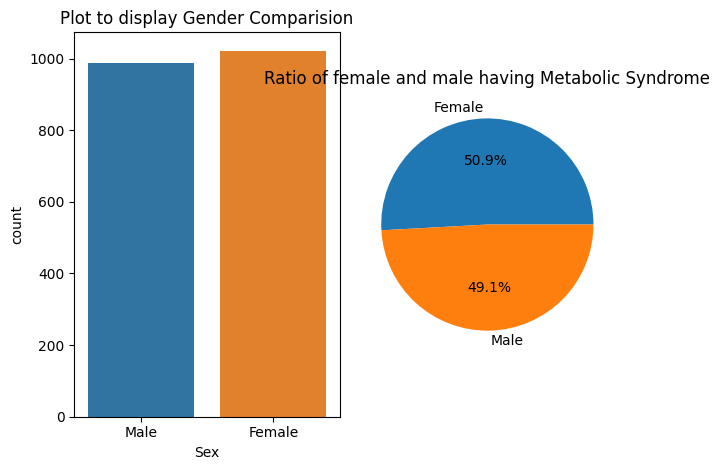

In [ ]:

_, (ax1, ax2) = plt.subplots(ncols=2)
sns.countplot(x="Sex", data=df, ax=ax1)
ax1.set_title("Plot to display Gender Comparision")

df.groupby("Sex").size().plot.pie(autopct="%.1f%%", ax=ax2)
ax2.set_title("Ratio of female and male having Metabolic Syndrome")
ax2.set_ylabel("");

plt.tight_layout()

Almost Equal probability in male and female patients

**[Stacked bar plot] Syndrome counts by Marital status**

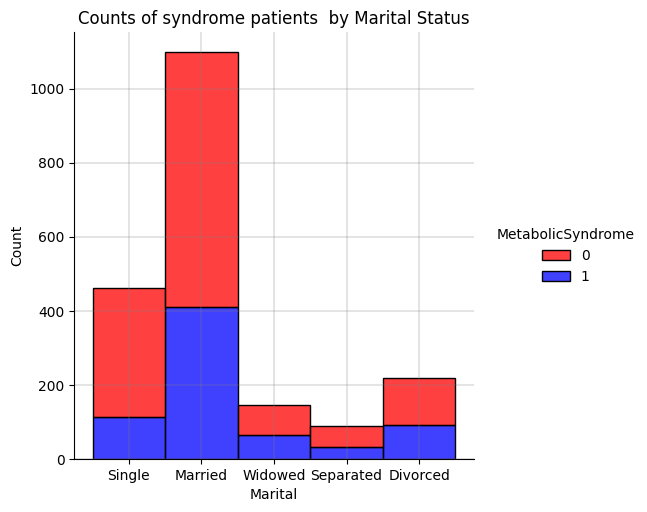

In [ ]:
from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'b','c'])))
sns.displot(data=df, x="Marital", hue="MetabolicSyndrome", multiple="stack")
plt.title("Counts of syndrome patients  by Marital Status")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")

For all marital status, there are chances of Metabolic Syndrome

**Pie chart: Patient distribution(age 18-65) by Race**

In [ ]:
age_adult = df[(df.Age >= 18) & (df.Age <= 65)]

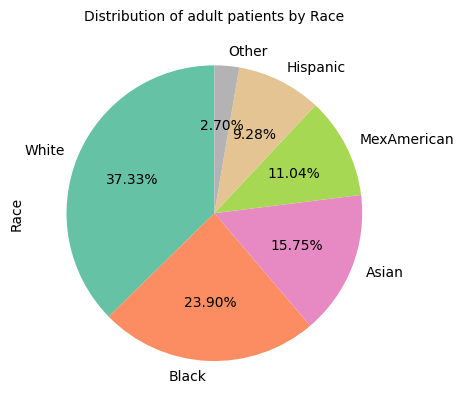

In [ ]:
age_adult['Race'].value_counts().plot(kind='pie', startangle=90, autopct='%1.2f%%', cmap='Set2')
plt.title("Distribution of adult patients by Race", fontsize=10);

White and Black race people have high chances of syndrome

**Violin plot: Distribution of age for syndrome patients**

Text(0, 0.5, 'BMI')

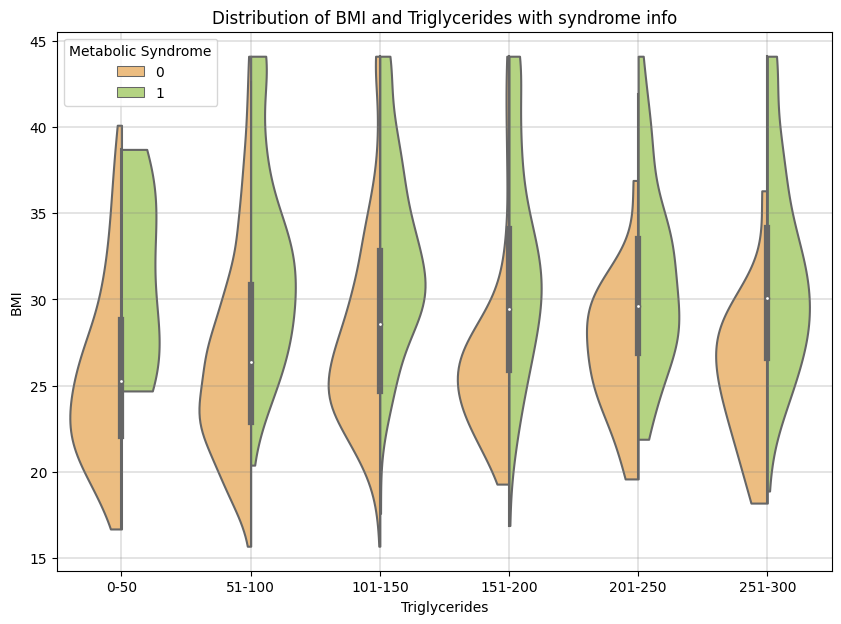

In [ ]:
plt.figure(figsize=(10, 7))

# split the violin plot to display the distribution for different targets
sns.violinplot(x="triglycerides_group", y="BMI", hue="MetabolicSyndrome", data=df, palette="RdYlGn", split=True, cut=0)
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.title("Distribution of BMI and Triglycerides with syndrome info");
plt.legend(loc='upper left', title='Metabolic Syndrome')
plt.xlabel("Triglycerides")
plt.ylabel('BMI')

No matter what the triglyceride value, BMI above 30 must be careful.

**Heat map: Average syndrome rate by gender and age-group**

In [ ]:
pivot_m = df.pivot_table(index='age_group', columns='Sex', values='MetabolicSyndrome', aggfunc=np.mean)
pivot_m

Sex,Female,Male
age_group,,
11-20,0.142857,0.187500
21-30,0.126582,0.136095
31-40,0.224138,0.283133
41-50,0.285714,0.418182
51-60,0.413174,0.488636
61-70,0.526012,0.458599
71-80,0.548872,0.442029


Text(33.22222222222222, 0.5, 'Age group')

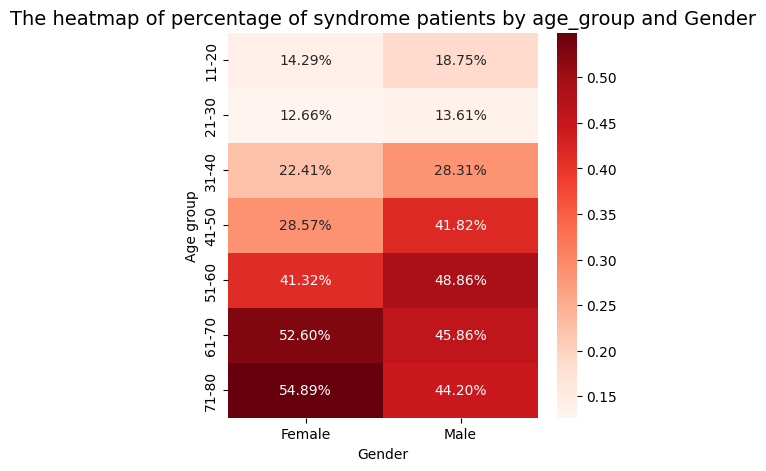

In [ ]:
plt.figure(figsize=(5,5))

sns.heatmap(pivot_m, cmap='Reds', annot=True, fmt='.2%') #Blues, Reds
plt.title('The heatmap of percentage of syndrome patients by age_group and Gender', fontsize=14);
plt.xlabel("Gender")
plt.ylabel("Age group")

Most of the male patients are affected after the age of 40 , while for females are mostly affected after their 50's.

**Heat map: Average syndrome rate by glucose and waist circumference**

In [ ]:
pivot_m = df.pivot_table(index='glucose_group', columns='waist_group', values='MetabolicSyndrome', aggfunc=np.mean)
pivot_m

waist_group,60-90,91-120,121-150
glucose_group,,,
60-80,0.000000,0.129032,0.500000
81-100,0.024719,0.192000,0.321429
101-120,0.147287,0.613483,0.863014
121-140,0.375000,0.765306,0.890411


Text(33.222222222222214, 0.5, 'Blood Glucose')

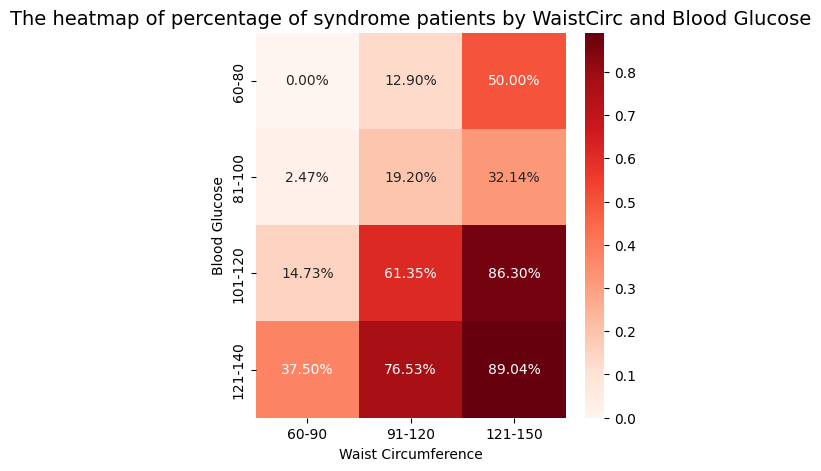

In [ ]:
plt.figure(figsize=(5,5))

sns.heatmap(pivot_m, cmap='Reds', annot=True, fmt='.2%') #Blues, Reds
plt.title('The heatmap of percentage of syndrome patients by WaistCirc and Blood Glucose', fontsize=14);
plt.xlabel("Waist Circumference")
plt.ylabel("Blood Glucose")

The answer for Goal 2 can be interpreted from above heat map. Persons with Glucose level > 121 and waist circumference > 121 have the most probability of affecting this syndrome.

**Box Plot: distribution of Income by BMI with syndrome  info¶**

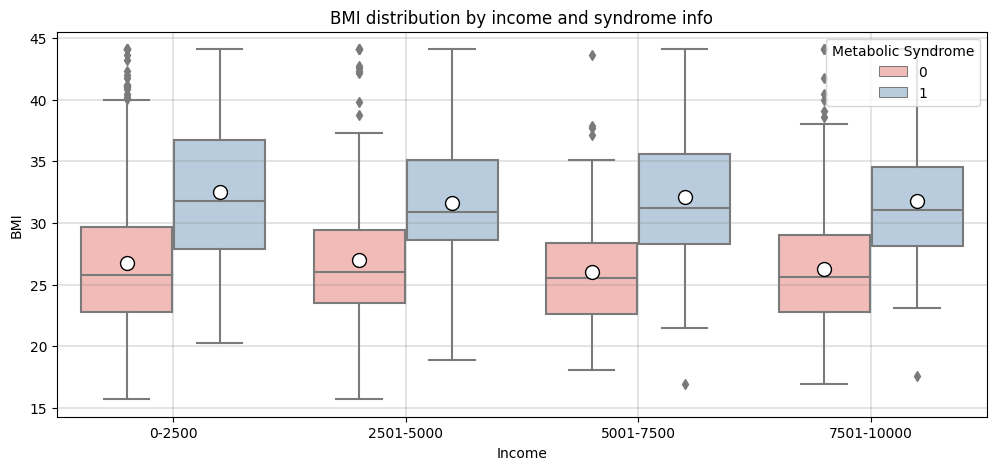

In [ ]:
#define graph size
plt.figure(figsize = (12,5))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set1.colors)

#Draw a boxplot with nested grouping by two categorical variables:
sns.boxplot(x="income_group", y="BMI", hue="MetabolicSyndrome", data = df,
           showmeans = True,  #line is the median, not the mean, mean is depicted in white circle
           meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"},
           palette="Pastel1"
           )
#place legend in center right of plot
plt.legend(loc='upper right', title='Metabolic Syndrome')
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.xlabel("Income")
plt.ylabel("BMI")
plt.title("BMI distribution by income and syndrome info"); #Add your title here

Patients with high BMI have more possibility of Metabolic Syndrome as compared to their low-BMI counter-parts.

 No matter what the income is, BMI above 27 have a high chance of Metabolic Syndrome

**Relation between independent variables(input variables) and target(output) variables**

    Input Independent variables are:
    seqn: Sequential identification number.
    Age: Age of the individual.
    Sex: Gender of the individual (e.g., Male, Female).
    Marital: Marital status of the individual.
    Income: Income level or income-related information.
    Race: Ethnic or racial background of the individual.
    WaistCirc: Waist circumference measurement.
    BMI: Body Mass Index, a measure of body composition.
    Albuminuria: Measurement related to albumin in urine.
    UrAlbCr: Urinary albumin-to-creatinine ratio.
    UricAcid: Uric acid levels in the blood.
    BloodGlucose: Blood glucose levels, an indicator of diabetes risk.
    HDL: High-Density Lipoprotein cholesterol levels (the "good" cholesterol).
    Triglycerides: Triglyceride levels in the blood.
    
    Output Dependent variables:
    MetabolicSyndrome

In [ ]:

print("Correlation between variables: \n ", df.corr(method='pearson'))

Correlation between variables: 
                         seqn       Age    Income  WaistCirc       BMI  \
seqn               1.000000 -0.005469  0.024616  -0.012626  0.002365   
Age               -0.005469  1.000000 -0.045014   0.247323  0.109068   
Income             0.024616 -0.045014  1.000000  -0.073446 -0.084214   
WaistCirc         -0.012626  0.247323 -0.073446   1.000000  0.910372   
BMI                0.002365  0.109068 -0.084214   0.910372  1.000000   
Albuminuria       -0.024135  0.208277 -0.109709   0.118361  0.075303   
UrAlbCr           -0.020491  0.279657 -0.136566   0.107931  0.065132   
UricAcid           0.014266  0.145784  0.011904   0.354663  0.275601   
BloodGlucose      -0.035077  0.375683 -0.113110   0.377156  0.304579   
HDL                0.058604  0.046944  0.087058  -0.363501 -0.306636   
Triglycerides      0.004105  0.129748 -0.048835   0.316169  0.232082   
MetabolicSyndrome  0.003857  0.276692 -0.098800   0.493778  0.439044   

                   Albuminuri

WaistCirc, BMI, BloodGlucose and Triglycerides have the most correlation to Metabolic Syndrome.

**Data Encoding**

In [ ]:
df = pd.get_dummies(df, columns=['Sex', 'Marital', 'Race'], drop_first=True)

In [ ]:
df['Sex_Male'] = df['Sex_Male'].astype(int)
df['Marital_Married'] = df['Marital_Married'].astype(int)
df['Marital_Separated'] = df['Marital_Separated'].astype(int)
df['Marital_Single'] = df['Marital_Single'].astype(int)
df['Marital_Widowed'] = df['Marital_Widowed'].astype(int)
df['Race_Black'] = df['Race_Black'].astype(int)
df['Race_Hispanic'] = df['Race_Hispanic'].astype(int)
df['Race_MexAmerican'] = df['Race_MexAmerican'].astype(int)
df['Race_Other'] = df['Race_Other'].astype(int)
df['Race_White'] = df['Race_White'].astype(int)

# Task 3: Data Modeling
Here, I applied different modeling techniques and compared scores

3.1)Linear Regression Model: (During analysis, I doubted a linear relationship like if glucose, bmi, waistcirc increase, chance for syndrome increase, so I took this model first)

Result: Less accuracy reported.

3.2)Logistic Regression: (to predict binary target variable, this model used to be good).

Result:            Accuracy better than linear model

3.3)Random Forest Classifier: Used to have good predictive accuracy. So tried it.

Result:       Good accuracy reported.

3.4)XGBoost Classifier: (Another algorithm well known for binary classification problems).

Result:       Good accuracy reported.

3.4.a)Tried XGBoost with feature selection & elimination method to see if accuracy improves. Feature Selection is performed using Recursive Feature Elimination.

3.4.b)Same applied for Random Forest and compared the ROC curve

 3.5)Integrated Neural Network with RELU(Rectified Linear Unit) activation and compared performance. Not better.

   3.6)Lasso regression (Tried this one as it usually work better when we have more features as independent variables)
   
   Result: Not that good score.


Please note that our third goal is to predict the syndrome in adults. So filtering out too young and too old patients.

In [ ]:
df = df[(df.Age >= 18) & (df.Age <= 65)]

In [ ]:
df.head()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,...,Sex_Male,Marital_Married,Marital_Separated,Marital_Single,Marital_Widowed,Race_Black,Race_Hispanic,Race_MexAmerican,Race_Other,Race_White
0,62161,22,8200.0,81.0,23.3,0,3.88,4.9,92.0,41.0,...,1,0,0,1,0,0,0,0,0,1
1,62164,44,4500.0,80.1,23.2,0,8.55,4.5,82.0,28.0,...,0,1,0,0,0,0,0,0,0,1
2,62169,21,800.0,69.6,20.1,0,5.07,5.4,107.0,43.0,...,1,0,0,1,0,0,0,0,0,0
3,62172,43,2000.0,120.4,33.3,0,5.22,5.0,104.0,73.0,...,0,0,0,1,0,1,0,0,0,0
6,62184,26,9000.0,78.6,22.1,0,9.21,5.4,87.0,61.0,...,1,0,0,1,0,1,0,0,0,0


In [ ]:
df.shape

(1594, 28)

In [ ]:
X = df.drop(columns=['age_group', 'bmi_group', 'waist_group', 'glucose_group', 'income_group', 'triglycerides_group', 'MetabolicSyndrome'])  # Droping the 'target' column to get the features
y = df['MetabolicSyndrome']  # selecting only the 'target' column as the target variable
X.head()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,...,Sex_Male,Marital_Married,Marital_Separated,Marital_Single,Marital_Widowed,Race_Black,Race_Hispanic,Race_MexAmerican,Race_Other,Race_White
0,62161,22,8200.0,81.0,23.3,0,3.88,4.9,92.0,41.0,...,1,0,0,1,0,0,0,0,0,1
1,62164,44,4500.0,80.1,23.2,0,8.55,4.5,82.0,28.0,...,0,1,0,0,0,0,0,0,0,1
2,62169,21,800.0,69.6,20.1,0,5.07,5.4,107.0,43.0,...,1,0,0,1,0,0,0,0,0,0
3,62172,43,2000.0,120.4,33.3,0,5.22,5.0,104.0,73.0,...,0,0,0,1,0,1,0,0,0,0
6,62184,26,9000.0,78.6,22.1,0,9.21,5.4,87.0,61.0,...,1,0,0,1,0,1,0,0,0,0


In [ ]:
y.head(2)

0    0
1    0
Name: MetabolicSyndrome, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**3.1). Check Linear regression model**

In [ ]:
from sklearn.linear_model import LinearRegression

#initiate linear regression model
model = LinearRegression()

#define predictor and response variables
X, y = df[['WaistCirc', 'BMI', 'BloodGlucose', 'Triglycerides']], df.MetabolicSyndrome

#fit regression model
model.fit(X, y)

LinearRegression()

In [ ]:
#print regression coefficients
pd.DataFrame(zip(X.columns, model.coef_))

,0,1
0,WaistCirc,0.004151
1,BMI,0.011341
2,BloodGlucose,0.009441
3,Triglycerides,0.002584


In [ ]:
#print intercept value
print(model.intercept_)

-1.671873389942747


In [ ]:
# Split the data randomly to test and train for input and output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)


In [ ]:
# Making a basic Linear Regression model for output
model1 = linear_model.LinearRegression()
model1.fit(X_train,y_train)
Y_hat1 = model1.predict(X_test)
accuracy1 = model1.score(X_test,y_test)
print("Accuracy estimated with Linear regression:", accuracy1)

Accuracy estimated with Linear regression: 0.46506125710219737


Very low accuracy reported with linear regression. So proceeding with other models

**3.2). Logistic Regression**

In [ ]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic regression accuracy:", accuracy)


Logistic regression accuracy: 0.8087774294670846


**3.3. Random Forest Classifier**


In [ ]:
# Creating a Random Forest Classifier model
random_forest_model = RandomForestClassifier(random_state=10)

# Fiting the model to the training data
random_forest_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy( without feature elimination) :", accuracy)

Random Forest Classifier Accuracy( without feature elimination) : 0.8808777429467085


**3.4). XGBoost Classifier**

In [ ]:
model_xgb=xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred = model_xgb.predict(X_test)


# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost  accuracy:", accuracy)

XGBoost  accuracy: 0.890282131661442


**3.4.a)XGBoost Modeling with feature elimination**

Good accuracy is reported. Let us check if accuracy is improved with feature selection and elimination method.

**Feature Selection**

In [ ]:
df.columns

Index(['seqn', 'Age', 'Income', 'WaistCirc', 'BMI', 'Albuminuria', 'UrAlbCr',
       'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides', 'MetabolicSyndrome',
       'age_group', 'bmi_group', 'waist_group', 'glucose_group',
       'income_group', 'triglycerides_group', 'Sex_Male', 'Marital_Married',
       'Marital_Separated', 'Marital_Single', 'Marital_Widowed', 'Race_Black',
       'Race_Hispanic', 'Race_MexAmerican', 'Race_Other', 'Race_White'],
      dtype='object')

In [ ]:
dataset = df.values


X = dataset[:,1:11]
Y = dataset[:,11]
Y

array([0, 0, 0, ..., 0, 1, 1], dtype=object)

In [ ]:
from sklearn.feature_selection import RFE

#Feature Selection for Metabolic Syndrome
model = xgb.XGBClassifier()
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X, y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)

Number of Features:  4
Selected Features:  [False False  True  True False False False  True False  True]
Feature Ranking:  [5 7 1 1 4 3 6 1 2 1]


WaistCirc, BMI, BloodGlucose and Triglycerides  were the top 4 selected features/feature combination for predicting Metabolic Syndrome using Recursive Feature Elimination

Four most irrelevant features seqn, Age, Albuminuria,UrAlbCr are being eliminated and predicting accuracy of report

In [ ]:
X = df.drop(columns=['age_group', 'bmi_group', 'waist_group', 'glucose_group', 'income_group', 'triglycerides_group', 'seqn', 'Age', 'Albuminuria', 'UrAlbCr', 'MetabolicSyndrome'])  # Droping the irrelvant and 'target' column to get the features
y = df['MetabolicSyndrome']  # selecting only the 'target' column as the target variable
X.head()

,Income,WaistCirc,BMI,UricAcid,BloodGlucose,HDL,Triglycerides,Sex_Male,Marital_Married,Marital_Separated,Marital_Single,Marital_Widowed,Race_Black,Race_Hispanic,Race_MexAmerican,Race_Other,Race_White
0,8200.0,81.0,23.3,4.9,92.0,41.0,84.0,1,0,0,1,0,0,0,0,0,1
1,4500.0,80.1,23.2,4.5,82.0,28.0,56.0,0,1,0,0,0,0,0,0,0,1
2,800.0,69.6,20.1,5.4,107.0,43.0,78.0,1,0,0,1,0,0,0,0,0,0
3,2000.0,120.4,33.3,5.0,104.0,73.0,141.0,0,0,0,1,0,1,0,0,0,0
6,9000.0,78.6,22.1,5.4,87.0,61.0,40.0,1,0,0,1,0,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)


In [ ]:
# Creating a XGB Classifier model
xgb_model = xgb.XGBClassifier(random_state=10)

# Fiting the model to the training data
xgb_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred_rf = xgb_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("XGBoost Accuracy with feature elimination:", accuracy)

XGBoost Accuracy with feature elimination: 0.905123339658444


*Accuracy of Prediction with XGBoost and feature elemination = 90.5%*

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculating precision
precision = precision_score(y_test, y_pred_rf)

# Calculating recall
recall = recall_score(y_test, y_pred_rf)

# Calculating F1-score
f1 = f1_score(y_test, y_pred_rf)

roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

Precision: 0.8383233532934131
Recall: 0.8588957055214724
F1-score: 0.8484848484848485
ROC AUC: 0.9664767747589833


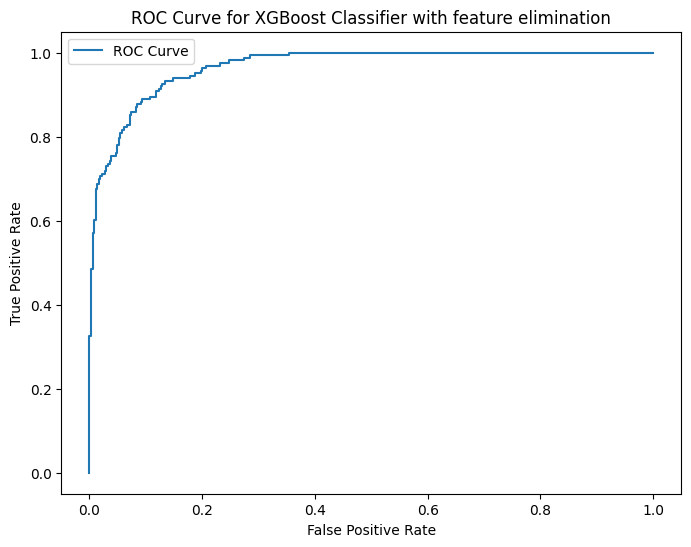

In [ ]:
# Ploting ROC curve
fpr, tpr, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost Classifier with feature elimination")
plt.legend()
plt.show()

The more that the ROC curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.

The closer AUC is to 1, the better the model. We have got 0.96 here in XGBoost

**3.4.b)Random Forest with feature elimination**

Since Random Forest also got almost same good accuracy, let us check Random Forest with feature elimination if it predicts better.

In [ ]:
X = df.drop(columns=['age_group', 'bmi_group', 'waist_group', 'glucose_group', 'income_group', 'triglycerides_group', 'MetabolicSyndrome'])  # Droping the 'target' column to get the features
y = df['MetabolicSyndrome']  # selecting only the 'target' column as the target variable
X.head()


,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,...,Sex_Male,Marital_Married,Marital_Separated,Marital_Single,Marital_Widowed,Race_Black,Race_Hispanic,Race_MexAmerican,Race_Other,Race_White
0,62161,22,8200.0,81.0,23.3,0,3.88,4.9,92.0,41.0,...,1,0,0,1,0,0,0,0,0,1
1,62164,44,4500.0,80.1,23.2,0,8.55,4.5,82.0,28.0,...,0,1,0,0,0,0,0,0,0,1
2,62169,21,800.0,69.6,20.1,0,5.07,5.4,107.0,43.0,...,1,0,0,1,0,0,0,0,0,0
3,62172,43,2000.0,120.4,33.3,0,5.22,5.0,104.0,73.0,...,0,0,0,1,0,1,0,0,0,0
6,62184,26,9000.0,78.6,22.1,0,9.21,5.4,87.0,61.0,...,1,0,0,1,0,1,0,0,0,0


In [ ]:
dataset = df.values


X = dataset[:,1:11]
Y = dataset[:,11]
Y

array([0, 0, 0, ..., 0, 1, 1], dtype=object)

In [ ]:
from sklearn.feature_selection import RFE

#Feature Selection for Metabolic Syndrome
model = RandomForestClassifier(random_state=10)
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X, y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking for Random forest ", fit.ranking_)

Number of Features:  4
Selected Features:  [False False  True  True False False False  True False  True]
Feature Ranking for Random forest  [4 6 1 1 7 3 5 1 2 1]


Here also we got WaistCirc, BMI, BloodGlucose and Triglycerides as the top 4 selected features/feature combination for predicting Metabolic Syndrome using Recursive Feature Elimination.

In [ ]:
X = df.drop(columns=['age_group', 'bmi_group', 'waist_group', 'glucose_group', 'income_group', 'triglycerides_group', 'seqn', 'Age', 'Albuminuria', 'UrAlbCr', 'MetabolicSyndrome'])  # Droping the irrelvant and 'target' column to get the features
y = df['MetabolicSyndrome']  # selecting only the 'target' column as the target variable
X.head()

,Income,WaistCirc,BMI,UricAcid,BloodGlucose,HDL,Triglycerides,Sex_Male,Marital_Married,Marital_Separated,Marital_Single,Marital_Widowed,Race_Black,Race_Hispanic,Race_MexAmerican,Race_Other,Race_White
0,8200.0,81.0,23.3,4.9,92.0,41.0,84.0,1,0,0,1,0,0,0,0,0,1
1,4500.0,80.1,23.2,4.5,82.0,28.0,56.0,0,1,0,0,0,0,0,0,0,1
2,800.0,69.6,20.1,5.4,107.0,43.0,78.0,1,0,0,1,0,0,0,0,0,0
3,2000.0,120.4,33.3,5.0,104.0,73.0,141.0,0,0,0,1,0,1,0,0,0,0
6,9000.0,78.6,22.1,5.4,87.0,61.0,40.0,1,0,0,1,0,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [ ]:
# Creating a Random Forest Classifier model
random_forest_model = RandomForestClassifier(random_state=10)

# Fiting the model to the training data
random_forest_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy( WITH feature elimination) :", accuracy)

Random Forest Classifier Accuracy( WITH feature elimination) : 0.8994307400379506


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculating precision
precision = precision_score(y_test, y_pred_rf)

# Calculating recall
recall = recall_score(y_test, y_pred_rf)

# Calculating F1-score
f1 = f1_score(y_test, y_pred_rf)

roc_auc = roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

Precision: 0.8353658536585366
Recall: 0.8404907975460123
F1-score: 0.837920489296636
ROC AUC: 0.9612013753118048


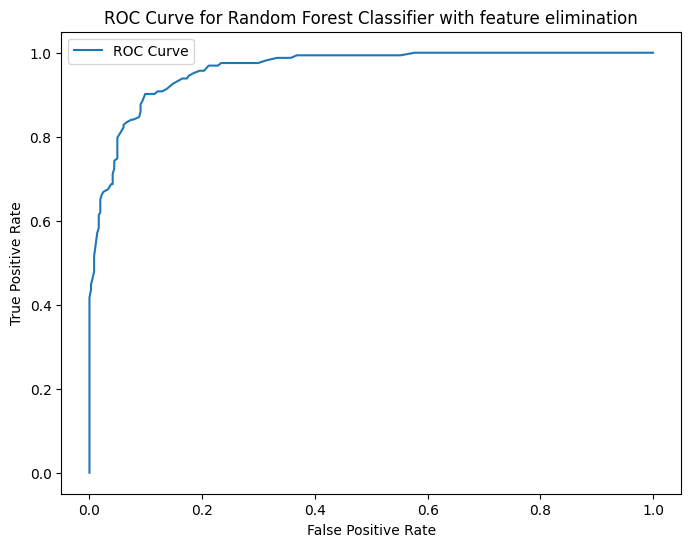

In [ ]:
# Ploting ROC curve
fpr, tpr, _ = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Classifier with feature elimination")
plt.legend()
plt.show()

Random Forest with feature elimination model have ROC AUC = 0.9612 which is slighly less than XGBoost, which means  XGBoost is scoring high so far.

Now before concluding lets try few other models too.


**3.5) Neural Network Integration**



In [ ]:
X = df.drop(columns=['age_group', 'bmi_group', 'waist_group', 'glucose_group', 'income_group', 'triglycerides_group', 'MetabolicSyndrome'])  # Droping the 'target' column to get the features
y = df['MetabolicSyndrome']  # selecting only the 'target' column as the target variable
X.head()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,...,Sex_Male,Marital_Married,Marital_Separated,Marital_Single,Marital_Widowed,Race_Black,Race_Hispanic,Race_MexAmerican,Race_Other,Race_White
0,62161,22,8200.0,81.0,23.3,0,3.88,4.9,92.0,41.0,...,1,0,0,1,0,0,0,0,0,1
1,62164,44,4500.0,80.1,23.2,0,8.55,4.5,82.0,28.0,...,0,1,0,0,0,0,0,0,0,1
2,62169,21,800.0,69.6,20.1,0,5.07,5.4,107.0,43.0,...,1,0,0,1,0,0,0,0,0,0
3,62172,43,2000.0,120.4,33.3,0,5.22,5.0,104.0,73.0,...,0,0,0,1,0,1,0,0,0,0
6,62184,26,9000.0,78.6,22.1,0,9.21,5.4,87.0,61.0,...,1,0,0,1,0,1,0,0,0,0


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=5, verbose=0)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                220       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 231 (924.00 Byte)
Trainable params: 231 (924.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


10/10 [==============================] - 0s 2ms/step - loss: 0.2236
Mean Squared Error on Test Set: 0.22356608510017395
10/10 [==============================] - 0s 2ms/step


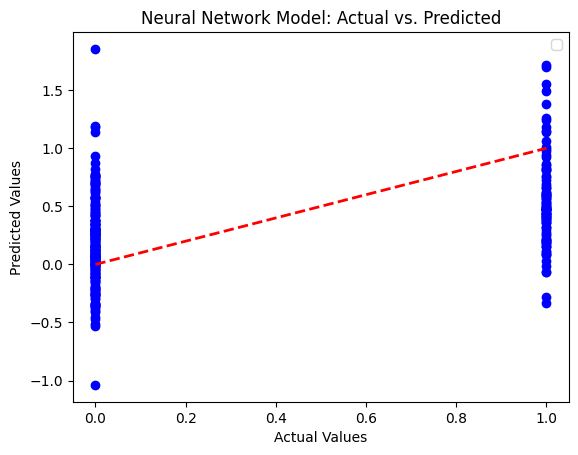

In [ ]:
# Evaluate the model on the test set
mse = model.evaluate(X_test_scaled, y_test)
print(f'Mean Squared Error on Test Set: {mse}')

# Make predictions using the trained model
y_pred = model.predict(X_test_scaled)

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Neural Network Model: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

MSE = 0.22 Hence its performance doesnot seems to be better than Random Forest and XGboost.

**3.6)LASSO REGRESSION**

Lasso might perform better in a situation where some of the predictors have large coefficients, and the remaining predictors have very small coefficients.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [ ]:
pipeline=Pipeline([
    ('scaler', StandardScaler()),
    ('model',Lasso())
])

In [ ]:
search=GridSearchCV(pipeline,
                   {'model__alpha':np.arange(0.1,3,0.1)},
                    cv=5,
                    scoring='neg_mean_squared_error',
                    verbose=3
                   )

In [ ]:
search.fit (X_train,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.132 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.128 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-0.146 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.131 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-0.124 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.182 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-0.204 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.191 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-0.176 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.178 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.213 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
search.best_params_

{'model__alpha': 0.1}

In [ ]:
coef= search.best_estimator_[1].coef_

In [ ]:
np.array(X.columns)[coef!=0]

array(['WaistCirc', 'BloodGlucose', 'Triglycerides'], dtype=object)

In [ ]:
np.array(X.columns)[coef == 0]

array(['seqn', 'Age', 'Income', 'BMI', 'Albuminuria', 'UrAlbCr',
       'UricAcid', 'HDL', 'Sex_Male', 'Marital_Married',
       'Marital_Separated', 'Marital_Single', 'Marital_Widowed',
       'Race_Black', 'Race_Hispanic', 'Race_MexAmerican', 'Race_Other',
       'Race_White'], dtype=object)

In [ ]:
#Splitting data to Training data and Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [ ]:
lasso = Lasso(alpha=0.1)

In [ ]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [ ]:
Lasso(alpha=0.1)

Lasso(alpha=0.1)

In [ ]:
y1LS_predict_train = lasso.predict(X_train)

In [ ]:
lasso_train_r2Value = r2_score(y_train,y1LS_predict_train)
#lasso_train_meanValue = mean_squared_error(y_train,y1LS_predict_train)
lasso_train_rootMeanValue = np.sqrt(MSE(y_train,y1LS_predict_train))


print("R2 Score : ", lasso_train_r2Value)
#print("\nMean Square Error (MSE): ", lasso_train_meanValue)
print("\nRoot Mean Squared Error (RMSE):", lasso_train_rootMeanValue)

R2 Score :  0.4872397163040949

Root Mean Squared Error (RMSE): 0.33381363503388484


Lasso regression score is NOT better than Random Forest model.

# Task 4: Evaluation

We have compared the scores of 6 different models and found XGBoost and Random Forest are scoring the best. So Lets perform K CrossFold Validation and hyperparameter optimization on them.

XGBoost offers a wide range of hyperparameters to give fine-grained control over model training procedure.



Let us plot a confusion matrix for XGBoost to evaluate its performance with feature elimination

XGBoost Accuracy with feature elimination: 0.905123339658444


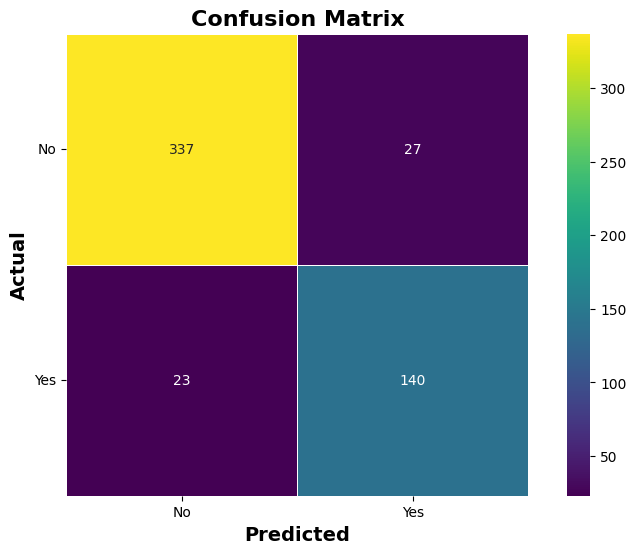

In [ ]:
X = df.drop(columns=['age_group', 'bmi_group', 'waist_group', 'glucose_group', 'income_group', 'triglycerides_group', 'seqn', 'Age', 'Albuminuria', 'UrAlbCr', 'MetabolicSyndrome'])  # Droping the irrelvant and 'target' column to get the features
y = df['MetabolicSyndrome']  # selecting only the 'target' column as the target variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

# Creating a XGB Classifier model
xgb_model = xgb.XGBClassifier(random_state=10)

# Fiting the model to the training data
xgb_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy with feature elimination:", accuracy)

#Plot Confusion matrix too
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))

sns.heatmap(
    cm, annot=True, fmt='d', cmap='viridis', linewidths=0.4, square=True, cbar=True,
    xticklabels=["No", "Yes"],
    yticklabels=["No", "Yes"]
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()

**Perform KFold Cross Validation**

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:


# Lists to store metrics across folds for Random Forest and XGradient Boosting
rf_accuracies = []
gb_accuracies = []
# Define Random Forest model
rf_model = RandomForestClassifier(random_state=42)
# Define XGradient Boosting model
gb_model = xgb.XGBClassifier(random_state=42)
# Perform KFold cross-validation using Random Forest and xGradient Boosting
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train Random Forest model
    #rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    rf_accuracies.append(accuracy_score(y_test, y_pred_rf))

    # Train XGradient Boosting model
    #gb_model = GradientBoostingClassifier(random_state=42)
    gb_model.fit(X_train, y_train)
    y_pred_gb = gb_model.predict(X_test)
    gb_accuracies.append(accuracy_score(y_test, y_pred_gb))

# Average accuracy across folds for each model
rf_average_accuracy = sum(rf_accuracies) / len(rf_accuracies)
gb_average_accuracy = sum(gb_accuracies) / len(gb_accuracies)

rf_average_accuracy, gb_average_accuracy

(0.8864434849470634, 0.900873405492794)

With K Fold validation,
Average accuracy for Random Forest = 88.64% and XGboost = 90.08%

**HyperParameter Optimization to improve the Performance of the Model**

In [ ]:
# Define hyperparameters grid for Random Forest
rf_param_grid = {
    'n_estimators': [5,50, 100, 200,300],
    'max_depth': [None, 10, 20, 30,50],
    'min_samples_split': [2, 5, 10,20,30,60],
    'min_samples_leaf': [1, 2, 4,8]
}

# Initialize GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid,
                              cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the grid search to the data
rf_grid_search.fit(X_scaled, y)

# Best parameters and score for Random Forest
rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_

rf_best_params, rf_best_score

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 300},
 0.8933538376609296)

With hyperparameters, the performance improved and new accuracy for Random forest Classifier is 89.33%

In [ ]:
# Define hyperparameters grid for XGradient Boosting
gb_param_grid = {
    'n_estimators': [5, 50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'max_depth': [None, 3, 5, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for XGradient Boosting
gb_grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42), gb_param_grid,
                              cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the grid search to the data
gb_grid_search.fit(X_scaled, y)

# Best parameters and score for XGradient Boosting
gb_best_params = gb_grid_search.best_params_
gb_best_score = gb_grid_search.best_score_

gb_best_params, gb_best_score

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


({'learning_rate': 0.1,
  'max_depth': 3,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.8977563533841998)

*So XGBoost classifier is not having much improvement this time. The best score identified in Task 3 for XGBoost Classifier with feature elmination is 90.5% accuracy.

# Task 5: Conclusion

To Summarize, in this project I tried to build a model which predict whether an adult has  metabolic syndrome based on the data from NHANES.

I conducted Exploratory Data Analysis and found answers to the first 2 questions mentioned in Goal  as follows:

Waist Circumference, BMI, Blood Glucose and Triglycerides are the major risk factors for Metabolic Syndrome.

Eventhogh both male and female have almost equal possibility, Male above age 50, BMI above 27, Blood glucose and Waist circumference above 121 have high chance of this syndrome. Hence those persons should be alerted as Prevention is better than cure.


After the dataset cleanup and data encoding, I segregated data for adult patients and tried different models WITH and WITHOUT feature elimination to see which model works better.

Random Forest and XGBoost classfiers perform almost equally well for this case.

Hence after choosing the best performing models, I applied K Fold-Cross Validation and HyperParameter Optimization to improve the Performance of the Model. Slight improvement in the performance of Random Forest is reported.

The final Accuracy of Prediction with XGBoost Classifier  is  90.5 % and the best among models.